# PROJECT

## Name:Ramanand k

# About Jamboree

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.



# Buisness Problem

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

# Problem statements

- Study the dataset for data cleaning and preprocessing
- Understanding the correlation of the numerical data
- Data visualisation steps like univariate,bivariate and multivariate analysis between different features
- Checking assumptions of linear regression to check Linear Regression is a better method to fit this data
   - Checking linearity between dependent and independent columns
   - Multicollinearity checking using VIF Score
   - Check Mean of residuals nearly zero
   - Checking normality of residuals
   - Test for homoscedasticity   
- Preparing independent and dependent columns and  split the data to training and testing and apply Linear Regression
- Do model evaluation by finding MAE,RMSE,R2-Score
- Finding Coefficient and intercept of the model
- Testing accuracy score of training and testing data
- Compare the difference between testing and training data and analyse the model overfit or underfit
- Cross validate the data and apply Ridge regression and Lasso regression to overcome overfit and underfit
- Check the accuracy score after applying Ridge and Lasso regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
df=pd.read_csv("Jamboree_Admission.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Removing unwanted columns

In [4]:
df=df.drop("Serial No.",axis=1)

# Shape of the Data

In [5]:
df.shape

(500, 8)

# Types of Data

In [6]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# Basic info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# Analysing Statistical Summary

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Null values in the Dataset

In [9]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Unique values and no of unique values

In [10]:
for i in df.columns:
    print(i,':',df[i].unique())

GRE Score : [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
TOEFL Score : [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
University Rating : [4 3 2 5 1]
SOP : [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
LOR  : [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
CGPA : [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 8.69 7.86 9.01 8

In [11]:
for i in df.columns:
    print(i,':',df[i].nunique())

GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


# No of Duplicate values

In [12]:
df.duplicated().sum()

0

# Value counts of the data

In [13]:
for i in df.columns:
    print(i,':',df[i].value_counts())

GRE Score : 312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64
TOEFL Score : 110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL Score, dtype: int64
University Rating : 3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
SOP : 4.0    89
3.5    88
3.0

# Univariate Analysis

# Histplot of each features

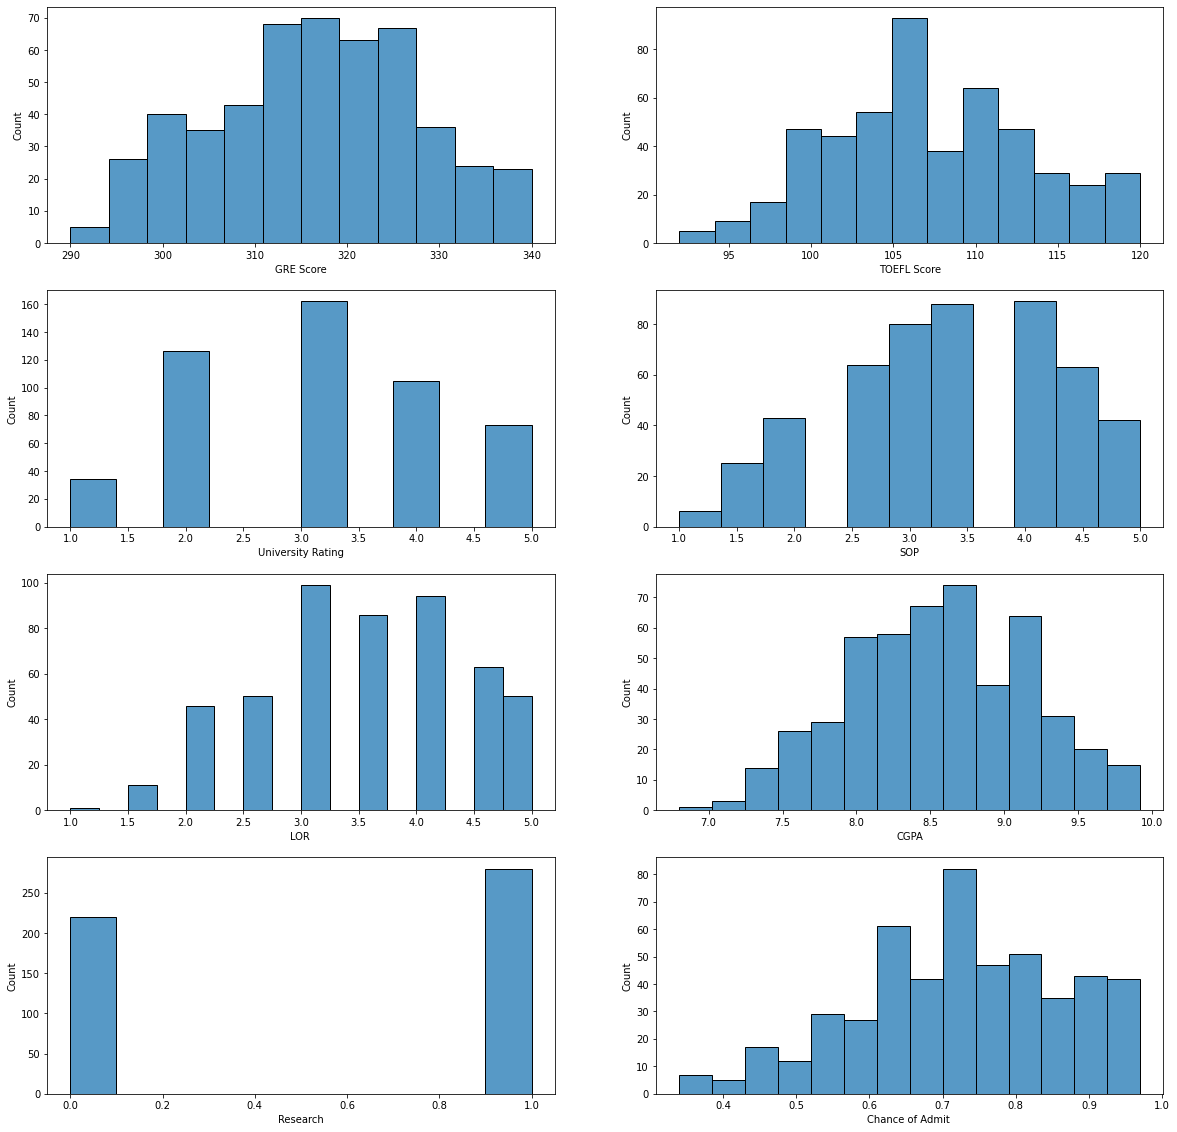

In [14]:
lst=df.columns
fig,axs=plt.subplots(nrows=4,ncols=2,figsize=(20,20))
count=0
for row in range(4):
    for col in range(2):
        sns.histplot(data=df,x=lst[count],ax=axs[row,col],palette='Set4')
        count=count+1
plt.show()

# Checking Outliers using boxplot

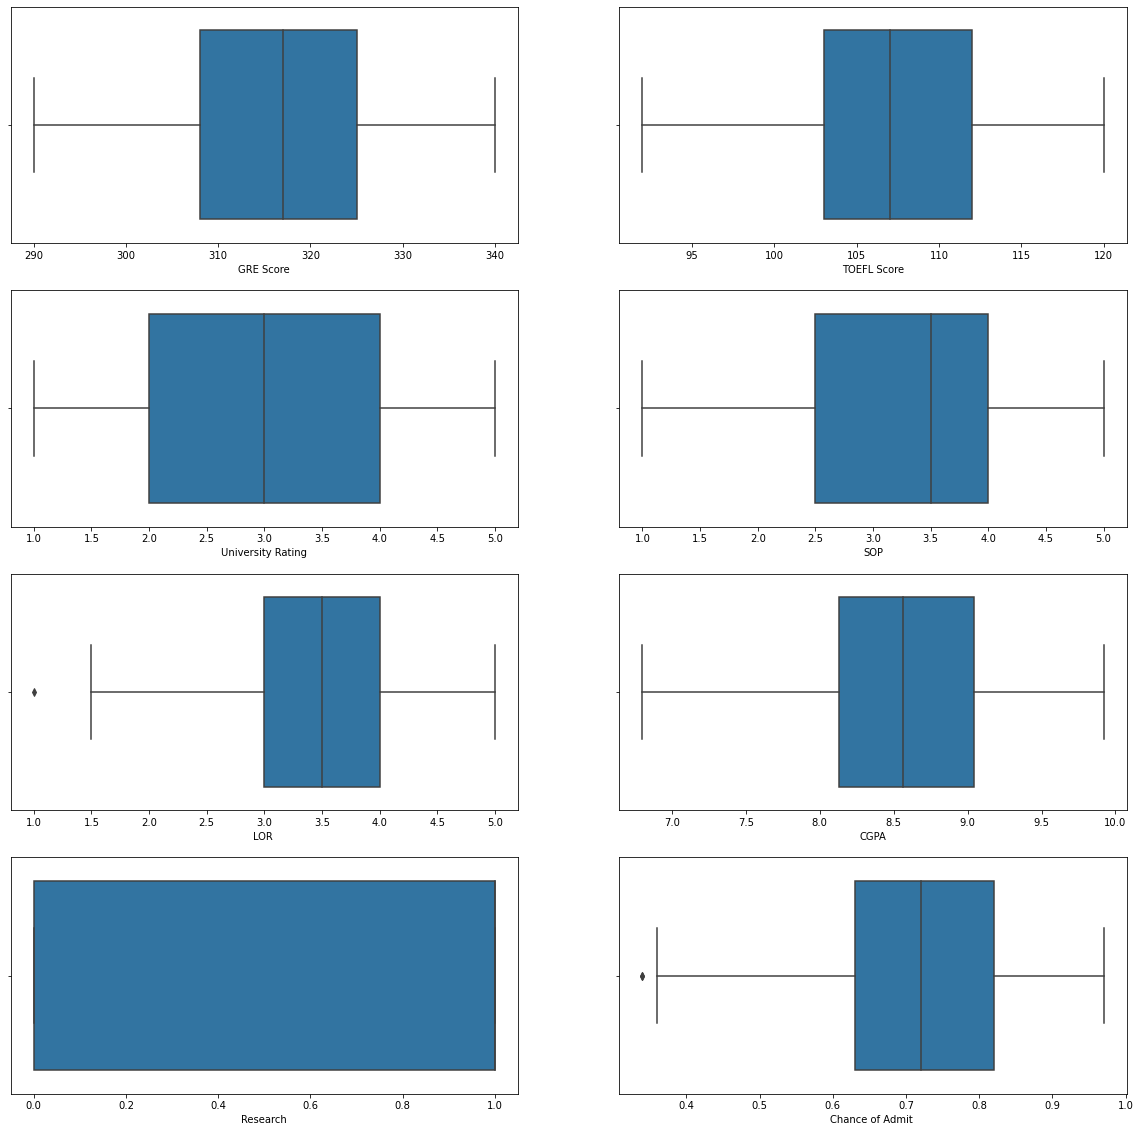

In [15]:
lst=df.columns
fig,axs=plt.subplots(nrows=4,ncols=2,figsize=(20,20))
count=0
for row in range(4):
    for col in range(2):
        sns.boxplot(data=df,x=lst[count],ax=axs[row,col])
        count=count+1
plt.show()

- The feature LOR and chance of Admit contain outliers

# Checking correlation of the data using Heatmap

<AxesSubplot:>

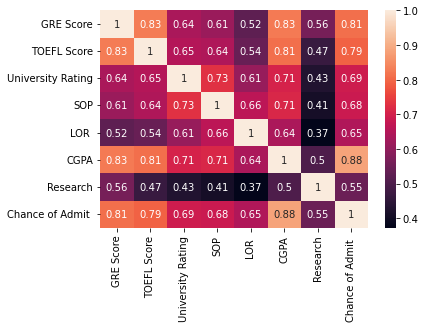

In [16]:
sns.heatmap(df.corr(),annot=True)

- most of the features of the data are positively correlated

# Multivariate Analysis

## Model Building

# Standardising the data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
scaler.fit(df)
standardised_df=scaler.transform(df)
df_standard=pd.DataFrame(standardised_df,columns=["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research","Chance of Admit"])

In [19]:
df_standard

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


## Preparing X and y

In [20]:
df_standard.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [21]:
X=df_standard.drop("Chance of Admit",axis=1)
y=df_standard["Chance of Admit"]

# Performing Linear Regression

# Model Bulding

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

# Splitting Data into Training and Testing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

# Fitting the Model

In [26]:
model.fit(X_train,y_train)

LinearRegression()

# Measuring the accuracy score of training data

In [27]:
model.score(X_train,y_train)

0.8192867210299637

# Measuring the score of testing data

In [28]:
model.score(X_test,y_test)

0.8260541587118343

## Coefficient Calculation

In [29]:
col=X.columns
coef=model.coef_
pd.DataFrame(coef,col)

,0
GRE Score,0.133277
TOEFL Score,0.133265
University Rating,0.054576
SOP,0.034256
LOR,0.101451
CGPA,0.507862
Research,0.075848


- From the model coefficient CGPA is the most important feature of the dataset

# Predicting Target variable

In [30]:
y_cap=model.predict(X_test)

## Model performance evaluation

## mean absolute error

In [31]:
MAE=sum((y_test-y_cap)**2)/df.shape[0]

In [32]:
MAE

0.048485595274007524

## root mean squared error

In [33]:
RMSE=math.sqrt(MAE)

In [34]:
RMSE

0.22019444878108876

## Finding R_Square

In [35]:
def R_square(y_test,y_cap):
    den=sum((y_test-y_test.mean())**2)
    num=sum((y_test-y_cap)**2)
    score=1-(num/den)
    return score

In [36]:
R_square(y_test,y_cap)

0.8260541587118341

## Finding Adj R2

## Scatterplot of y_predicted and y_actual 

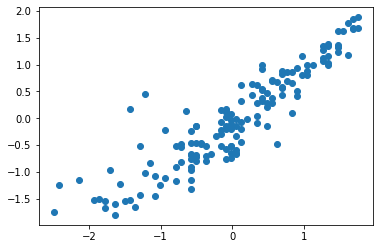

In [37]:
plt.scatter(x=y_test,y=y_cap)

#### Scatterplot of y_predicted and y_actual shows a linear relationship 

In [38]:
y_test.shape

(150,)

## Distribution of predicted and actual

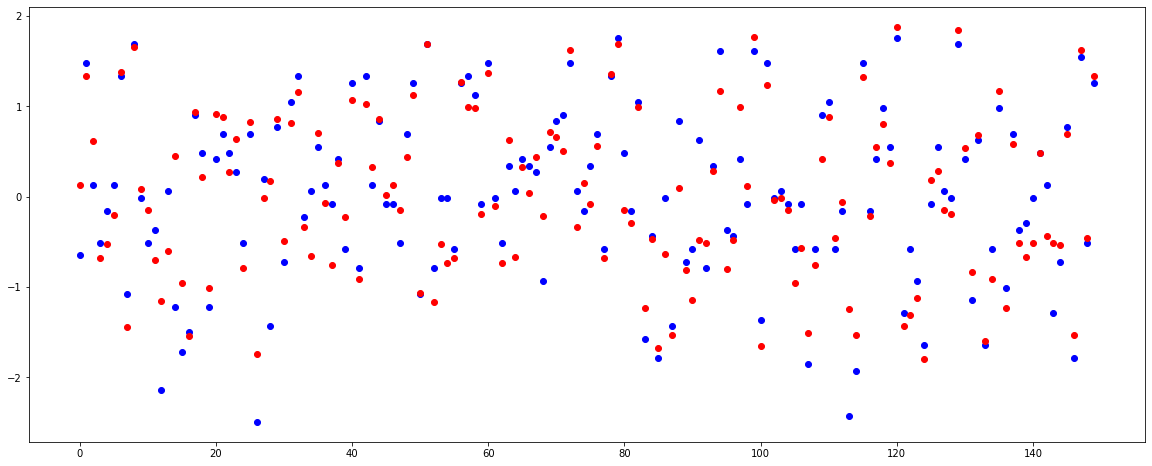

In [39]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.scatter(c,y_test,color="blue")
plt.scatter(c,y_cap,color="red")

## Distribution of error

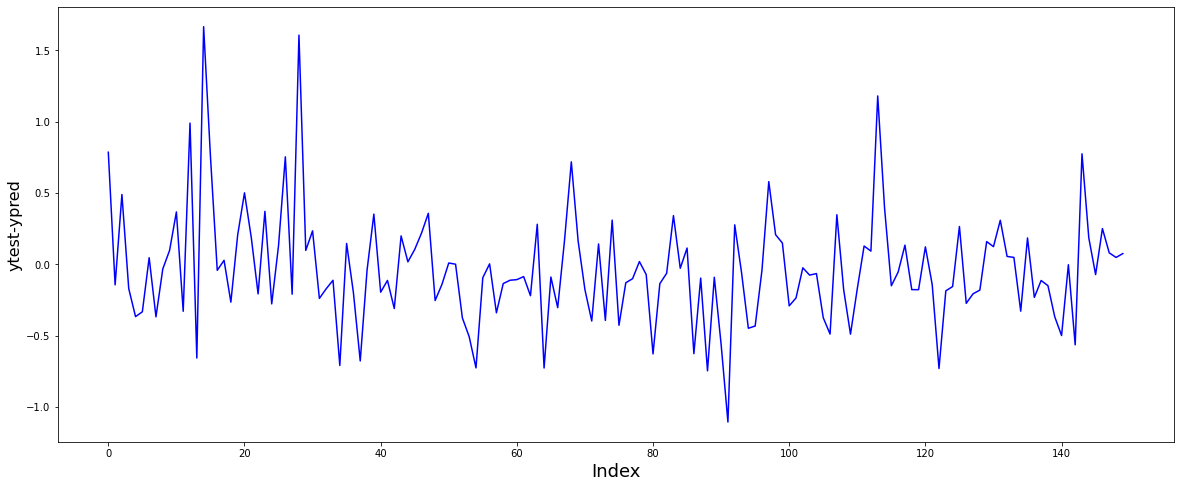

In [40]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,y_cap-y_test,color="blue")
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()


# Checking assumptions of linear regression

## Checking Linearity

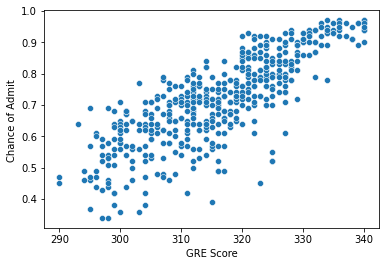

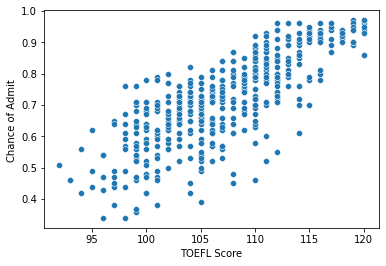

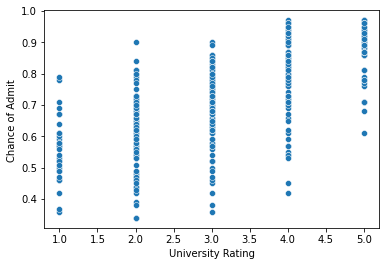

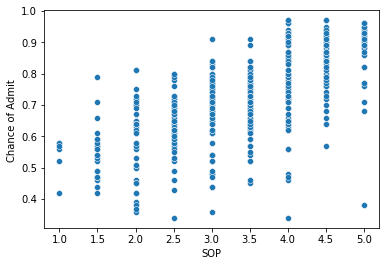

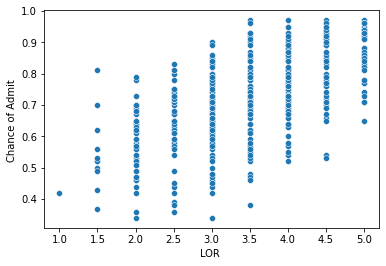

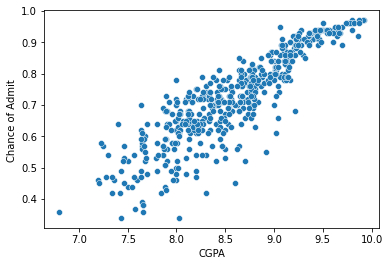

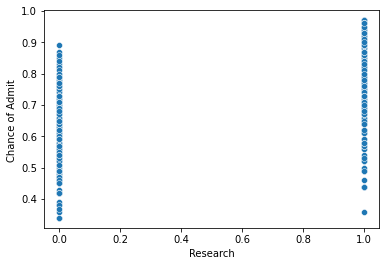

In [41]:
for i in df.columns:
    if i==df.columns[-1]:
        break
    else:
        fig,ax=plt.subplots(nrows=1,ncols=1)
        sns.scatterplot(x=df[i],y=df["Chance of Admit "])

#### Every features showing linear relationship with target variable so it follows linearity

## Checking multicollinearity using VIF Score

In [42]:
def multi_collinear():
    vif_lst=[]
    for i in X.columns:
        X1=X[i].values
        X2=X.drop(i,axis=1)
        X2=X2.values
        model.fit(X2,X1)
        X1_hat=model.predict(X2)
        den=sum(((X1-X1.mean())**2))     
        num=sum((X1-X1_hat)**2)
        score=1-(num/den)
        vif=1/(1-(score))
        vif_lst.append(vif)
    return vif_lst

In [43]:
multi_collinear()

[4.464249139118506,
 3.9042133308172695,
 2.6210362171283137,
 2.835210350886524,
 2.033554860544099,
 4.777991929494222,
 1.4940078664337364]

In [44]:
# UDF for calculating vif value
import statsmodels.api as sm
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [45]:
vif_cal(df_standard,"Chance of Admit")

,Var,Vif
5,CGPA,4.78
0,GRE Score,4.46
1,TOEFL Score,3.90
3,SOP,2.84
2,University Rating,2.62
4,LOR,2.03
6,Research,1.49


#### All VIF Scores less than 5 so it does not follow multicollinearity so all features are significant

# Checking normality of residual of the data

In [46]:
residual_aggregate=y_test-y_cap

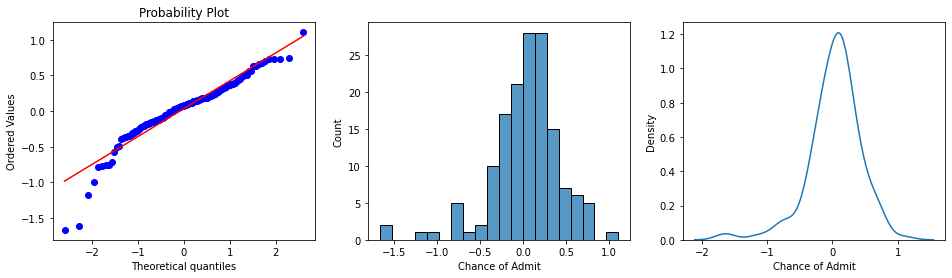

In [47]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(16,4))
residual_plot1=stats.probplot(residual_aggregate,plot=ax[0])
residual_plot=sns.histplot(residual_aggregate,ax=ax[1])
residual_plot1=sns.kdeplot(residual_aggregate,ax=ax[2])

#### From probplot and kdeplot The residuals of the entire data follows normal distribution

## Checking mean of residuals

In [48]:
np.mean(y_test-y_cap)

0.034557380244280365

#### Mean of residuals is almost zero

## Test for homoscedasticity

In [49]:
np.var(residual_aggregate)

0.16042443838401058

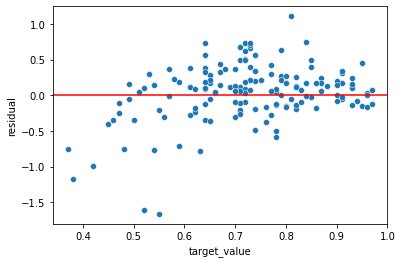

In [50]:
residualplot=pd.DataFrame()
residualplot["residual"]=residual_aggregate
residualplot["target_value"]=df["Chance of Admit "]
sns.scatterplot(data=residualplot,x="target_value",y="residual")
plt.axhline(y=0,color="red")

#### Variance of the residual is almost zero
#### Scatterplot of residual and target value does not follow any patterns
#### It follows homoscedasticity

# Checking P value using OLS method

In [51]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     221.5
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          6.34e-123
Time:                        20:39:03   Log-Likelihood:                -202.37
No. Observations:                 350   AIC:                             420.7
Df Residuals:                     342   BIC:                             451.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0104      0.02

C:\Users\raman\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


- P value of university rating and SOP are greater than 0.5 so these features are insignificant in OLS method 

# Applying Ridge and Lasso regression

# Ridge regression

In [52]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [53]:
# here alpha represents hyper parameter tuning
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

In [54]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

# Average accuracy score for each Alpha value

In [55]:
# average accuracy score for each alpha value put in a data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000804,0.000993,0.002645,0.005291,0.0001,{'alpha': 0.0001},0.839001,0.824298,0.755842,0.831106,...,0.808301,0.030857,25,0.813628,0.81508,0.83347,0.814044,0.824219,0.820088,0.00774
1,0.000000,0.000000,0.000000,0.000000,0.001,{'alpha': 0.001},0.839002,0.824299,0.755842,0.831105,...,0.808301,0.030857,23,0.813628,0.81508,0.83347,0.814044,0.824219,0.820088,0.00774
2,0.000000,0.000000,0.000000,0.000000,0.005,{'alpha': 0.005},0.839002,0.824305,0.755841,0.831104,...,0.808302,0.030858,22,0.813628,0.81508,0.83347,0.814044,0.824219,0.820088,0.00774
3,0.003334,0.006669,0.000000,0.000000,0.007,{'alpha': 0.007},0.839003,0.824308,0.755841,0.831103,...,0.808303,0.030858,21,0.813628,0.81508,0.83347,0.814044,0.824219,0.820088,0.00774
4,0.003126,0.006252,0.000261,0.000521,0.001,{'alpha': 0.001},0.839002,0.824299,0.755842,0.831105,...,0.808301,0.030857,23,0.813628,0.81508,0.83347,0.814044,0.824219,0.820088,0.00774


# Finding best alpha value from the dataset

In [56]:
cv_results.loc[cv_results.mean_test_score==cv_results.mean_test_score.max(),"param_alpha"]

23    10.0
Name: param_alpha, dtype: object

In [57]:
# alpha value 9 gives the best average accuracy

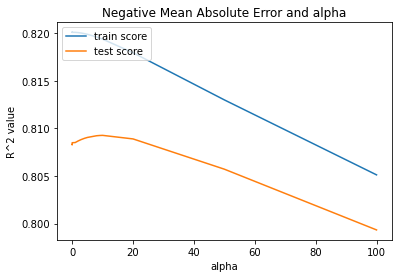

In [58]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2 value')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- From the graph we can see that the values of alpha maximum between 5 to 10

# Applying ridge regression with best alpha values

In [59]:
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=9)

In [60]:
ridge.score(X_test,y_test)

0.8254820491091377

- A small improvement in the accuracy score after applying ridge regression

# scatterplot of y_pred and y_test in ridge regression

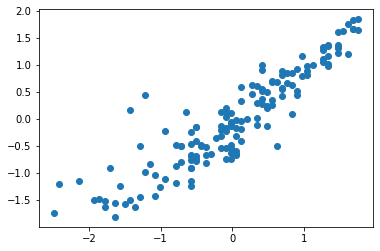

In [61]:
y_cap=ridge.predict(X_test)
plt.scatter(x=y_test,y=y_cap)

# Distribution of predicted and actual in Ridge regression

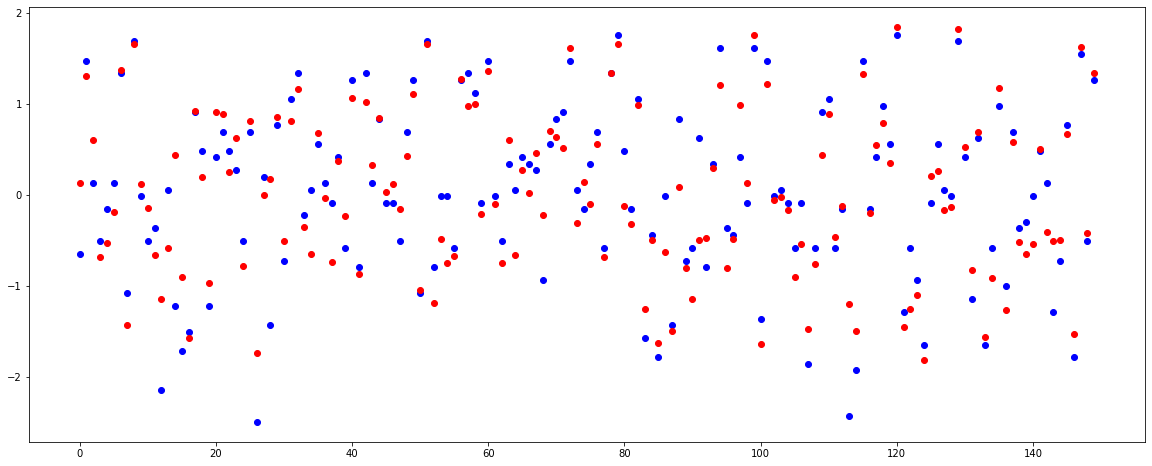

In [62]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.scatter(c,y_test,color="blue")
plt.scatter(c,y_cap,color="red")

# Distribution of error in Ridge regression

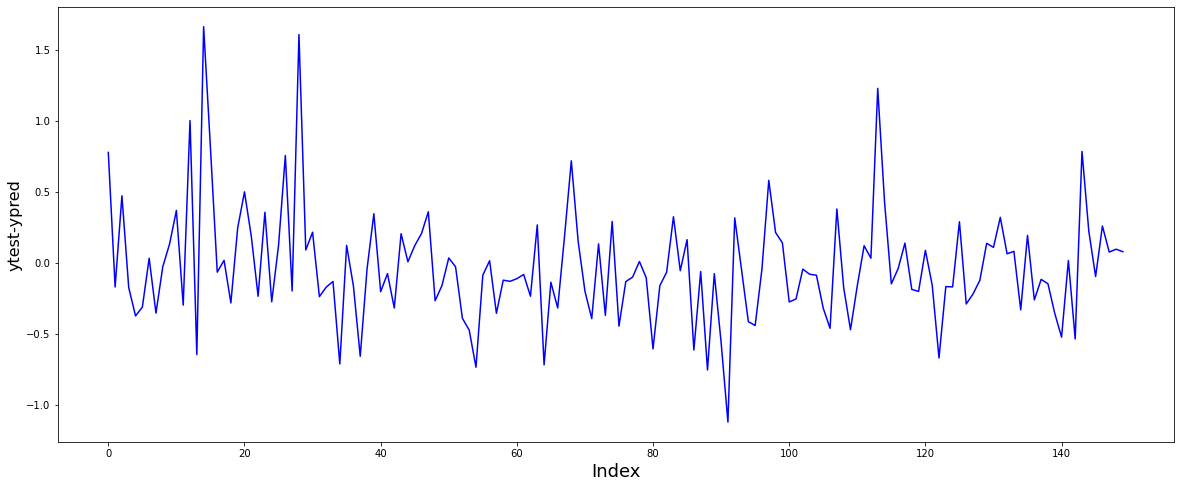

In [63]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,y_cap-y_test,color="blue")
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()


# Lasso Regression

In [64]:
#cross validation
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001139,0.001445,0.001324,0.001705,0.0001,{'alpha': 0.0001},0.839006,0.824336,0.755827,0.831091,...,0.808304,0.030865,6,0.813628,0.815080,0.833470,0.814044,0.824219,0.820088,0.007740
1,0.003085,0.005926,0.000099,0.000199,0.001,{'alpha': 0.001},0.839043,0.824674,0.755696,0.830955,...,0.808330,0.030930,4,0.813626,0.815078,0.833469,0.814042,0.824217,0.820086,0.007740
2,0.001290,0.002580,0.002891,0.005781,0.005,{'alpha': 0.005},0.839196,0.826154,0.755088,0.830318,...,0.808418,0.031233,3,0.813586,0.815041,0.833430,0.814001,0.824179,0.820048,0.007740
3,0.000198,0.000397,0.000000,0.000000,0.007,{'alpha': 0.007},0.839249,0.826868,0.754764,0.829984,...,0.808441,0.031389,2,0.813547,0.815004,0.833392,0.813961,0.824142,0.820009,0.007741
4,0.003126,0.006253,0.000000,0.000000,0.001,{'alpha': 0.001},0.839043,0.824674,0.755696,0.830955,...,0.808330,0.030930,4,0.813626,0.815078,0.833469,0.814042,0.824217,0.820086,0.007740


In [66]:
cv_results.loc[cv_results.mean_test_score==cv_results.mean_test_score.max(),"param_alpha"]

5    0.01
Name: param_alpha, dtype: object

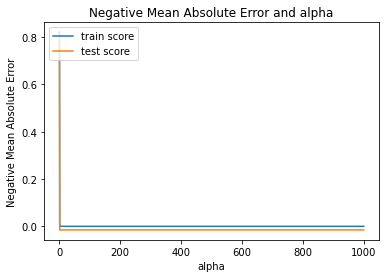

In [67]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- From the graph best alpha values nearly 0.01

# Applying Lasso regression with best Alpha values

In [68]:
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_

array([0.13278573, 0.12966355, 0.05279783, 0.03155711, 0.09702715,
       0.5102935 , 0.06998321])

In [69]:
lasso.score(X_test,y_test)

0.826576973464016

- A small improvement in the accuracy score after applying Lasso regression

# Scatterplot of y_pred and y_test in Lasso regression

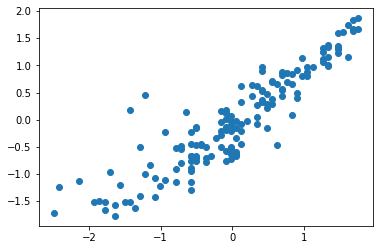

In [70]:
y_cap=lasso.predict(X_test)
plt.scatter(x=y_test,y=y_cap)

# Distribution of predicted and actual in Lasso regression

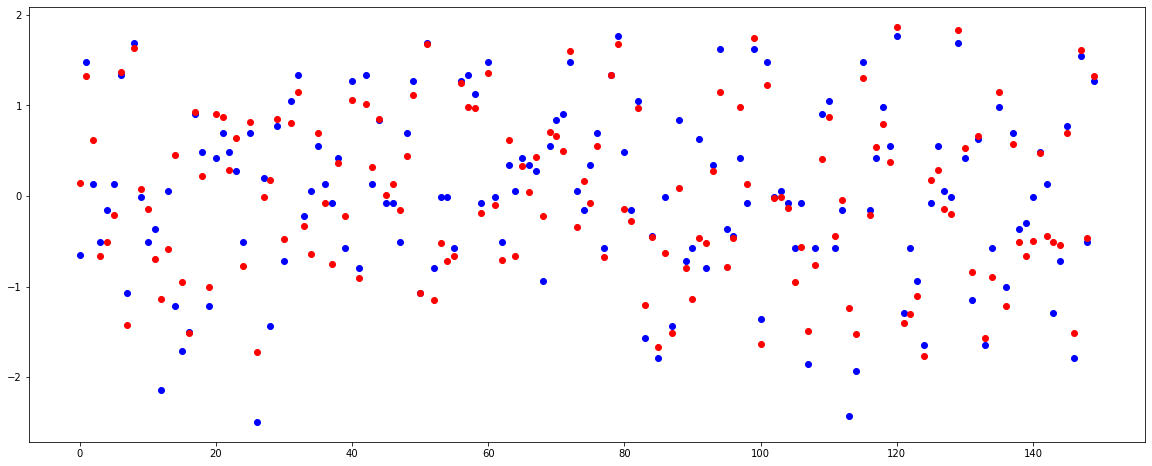

In [71]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.scatter(c,y_test,color="blue")
plt.scatter(c,y_cap,color="red")

# Distribution of error in Lasso regression

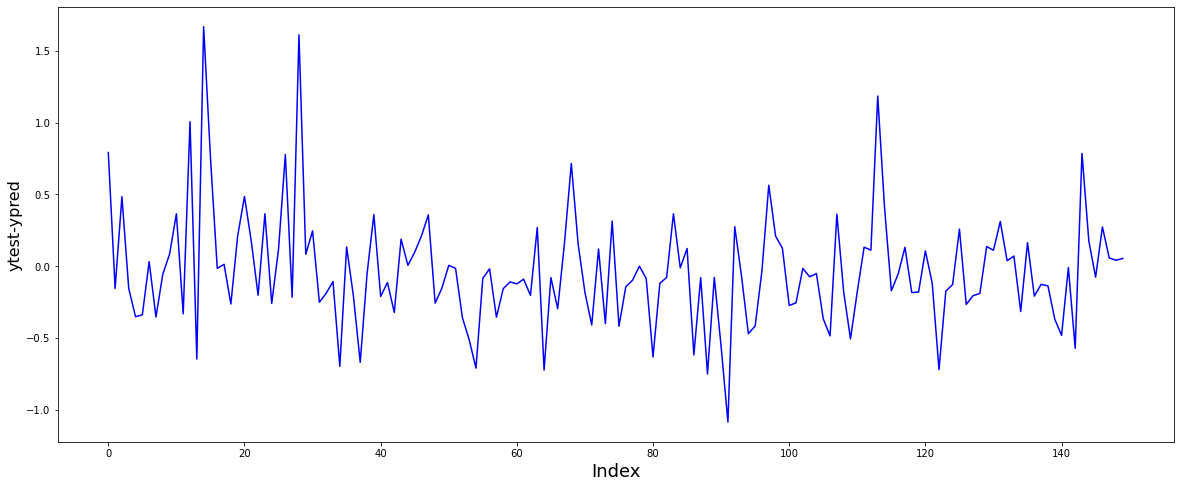

In [72]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,y_cap-y_test,color="blue")
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()


# Predictive Analysis

- A high correlation is present between dependent and independent features
- The data follows the assumptions of Linear Regression so Linear Regression is the best algorithm to fit dependent and independent features
- CGPA has the highest coefficient followed by GRE score and TOEFL score so these are the important features of the dataset
- Accuracy Score slightly increases when applying Ridge and Lasso regression


# Recommendations

All features positively correlated with the chance of admit so improving any of features improves chance of admission. Higher CGPA,TOEFL Score and GRE Score of the person has the most chance to get the admission so to concentrate more on these will improve the probability of getting the admission compared to other features.
